Importing libraries and functions

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Reading data from csv file

In [250]:
df = pd.read_csv('mushrooms 2.csv')
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Printing shape of the dataset

In [251]:
df.shape

(8124, 23)

Getting numerical features and categorical features

In [252]:
num_features = df.select_dtypes(exclude=['object']).columns.tolist()
obj_features = df.select_dtypes(include=['object']).columns.tolist()

Filling missing data

In [253]:
def FillMissingData(df,obj_features):
    df_obj = df[obj_features]
    si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    si.fit(df_obj)
    df_obj=si.transform(df_obj)

    df[obj_features] = df_obj
    return df
df = FillMissingData(df,obj_features)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [254]:
def showBarPlot(m,n):
    """
        Arrange and Display data in bar plots from feature m to n
        m - n must be 6 as the plot has 6 subplots
    """
    subplotNumber = 1
    plt.figure(figsize=(14,10))
    for k in range(m,n):

        feature_data = df[obj_features[k]]
        groups = np.unique(feature_data)
        b = { g:[0,0] for g in groups}

        # Get Count of poisonous and edible mushrooms for each value of the feature
        for i in range(len(feature_data)):
            if df['class'][i] == 'p':
                b[feature_data[i]][0]+=1
            else:
                b[feature_data[i]][1]+=1

        # Arrange Count of poisonous and edible mushrooms for each value of the feature
        # to be in two lists P(poisonous) and E(edible)
        P = []
        E = []
        for i in b.values():
            P.append(i[0])
            E.append(i[1])
        print(P)
        print(E)

        X_axis = np.arange(len(groups))
        print("At k = ",k,"",k%n)
        
        plt.subplot(2, 3, subplotNumber)
        subplotNumber+=1
        plt.xticks(X_axis, groups)
        plt.bar(X_axis-0.2, P, width=0.4, label='Poisonsous')
        plt.bar(X_axis+0.2, E, width=0.4, label='Edible')
        plt.xlabel("Values for "+obj_features[k])
        plt.ylabel("Number of Mushrooms")
        plt.title("Number of Mushrooms in each group")
        plt.legend()
    
    plt.show()

Plotting bar plots of each feature value with respect to count of poisonous or non-poisonous

[48, 4, 1556, 600, 0, 1708]
[404, 0, 1596, 228, 32, 1948]
At k =  1  1
[760, 4, 1412, 1740]
[1560, 0, 1144, 1504]
At k =  2  2
[120, 12, 876, 808, 1020, 88, 0, 0, 320, 672]
[48, 32, 624, 1032, 1264, 56, 16, 16, 720, 400]
At k =  3  3
[3292, 624]
[1456, 2752]
At k =  4  4
[0, 192, 2160, 0, 36, 120, 256, 576, 576]
[400, 0, 0, 400, 0, 3408, 0, 0, 0]
At k =  5  5
[18, 3898]
[192, 4016]
At k =  6  6


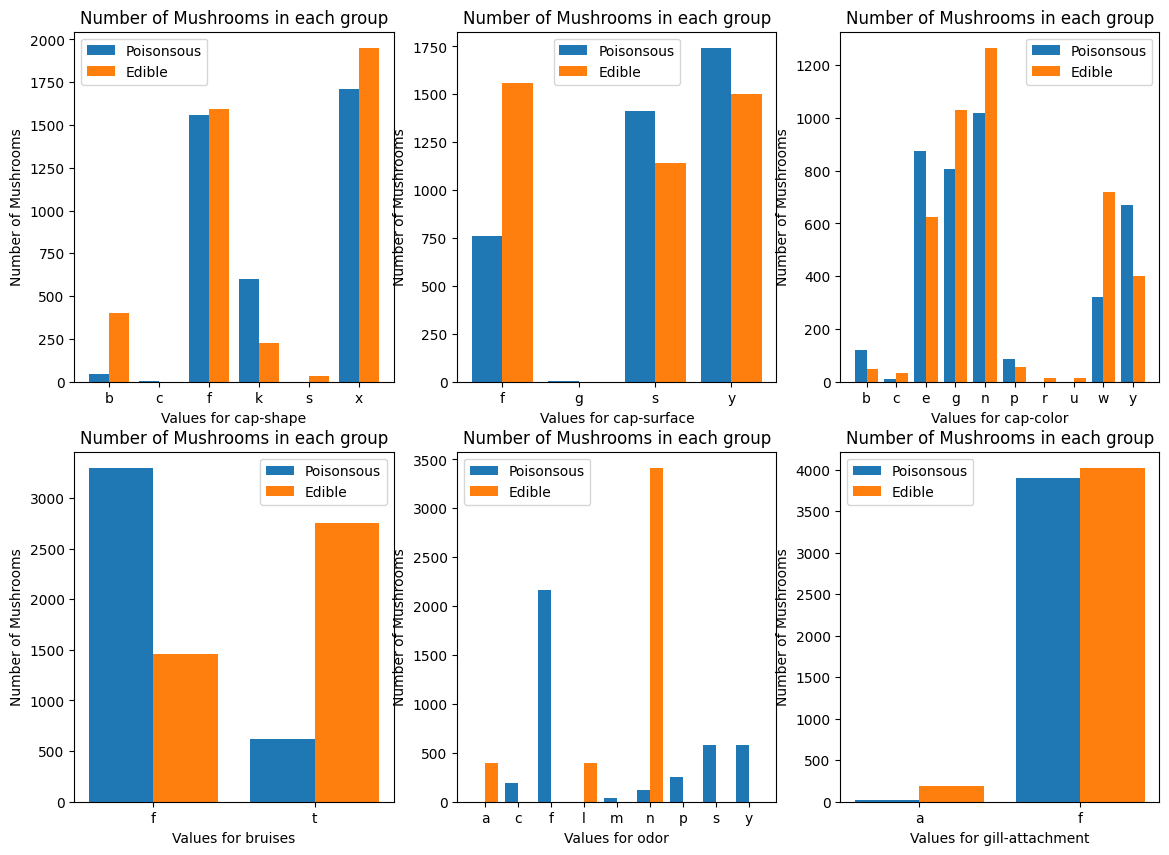

In [255]:
showBarPlot(1,7)

[3804, 112]
[3008, 1200]
At k =  7  7
[1692, 2224]
[3920, 288]
At k =  8  8
[1728, 0, 504, 528, 64, 112, 0, 640, 24, 48, 246, 22]
[0, 96, 248, 204, 344, 936, 64, 852, 0, 444, 956, 64]
At k =  9  9
[1900, 2016]
[1616, 2592]
At k =  10  10
[1760, 1856, 44, 256, 0]
[720, 1920, 512, 864, 192]
At k =  11  11
[144, 2228, 1536, 8]
[408, 144, 3640, 16]
At k =  12  12


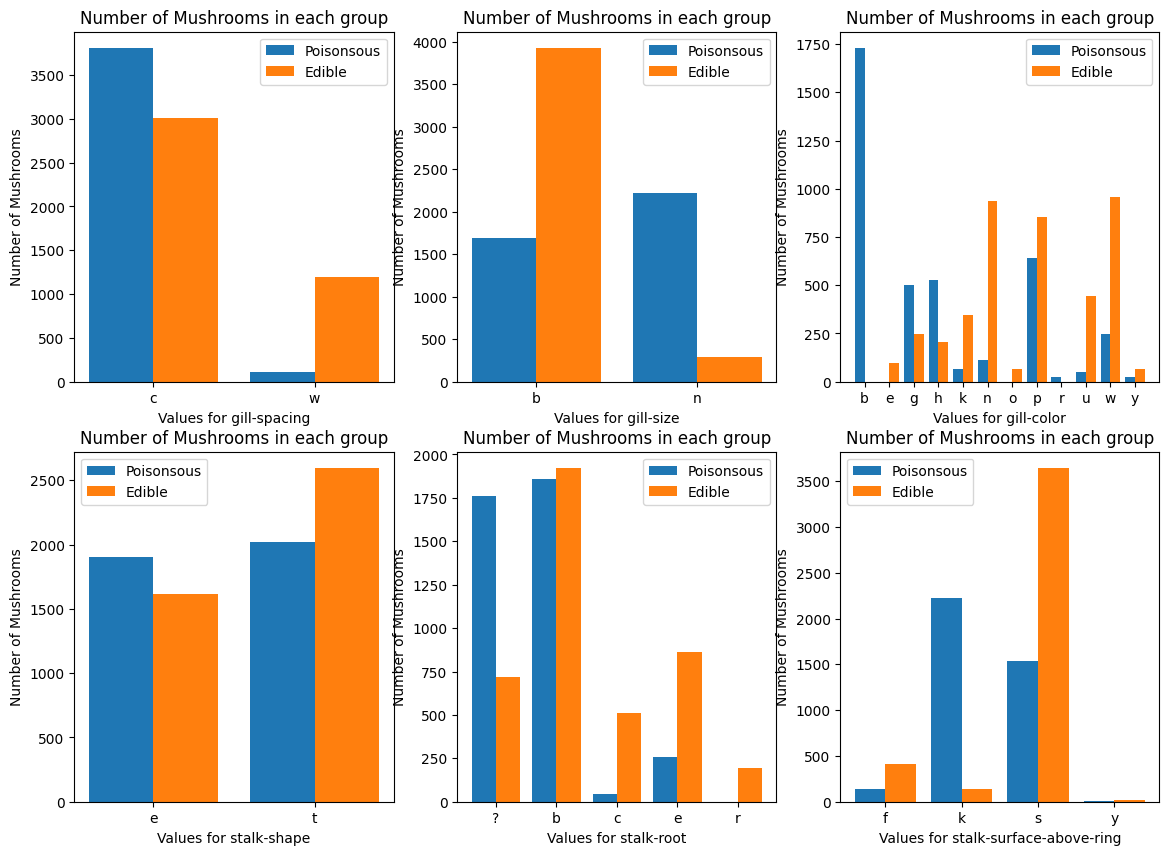

In [256]:
showBarPlot(7,13)


[144, 2160, 1536, 76]
[456, 144, 3400, 208]
At k =  13  13
[432, 36, 0, 0, 432, 0, 1296, 1712, 8]
[0, 0, 96, 576, 16, 192, 576, 2752, 0]
At k =  14  14
[432, 36, 0, 0, 448, 0, 1296, 1680, 24]
[0, 0, 96, 576, 64, 192, 576, 2704, 0]
At k =  15  15
[3916]
[4208]
At k =  16  16
[0, 0, 3908, 8]
[96, 96, 4016, 0]
At k =  17  17
[36, 3808, 72]
[0, 3680, 528]
At k =  18  18


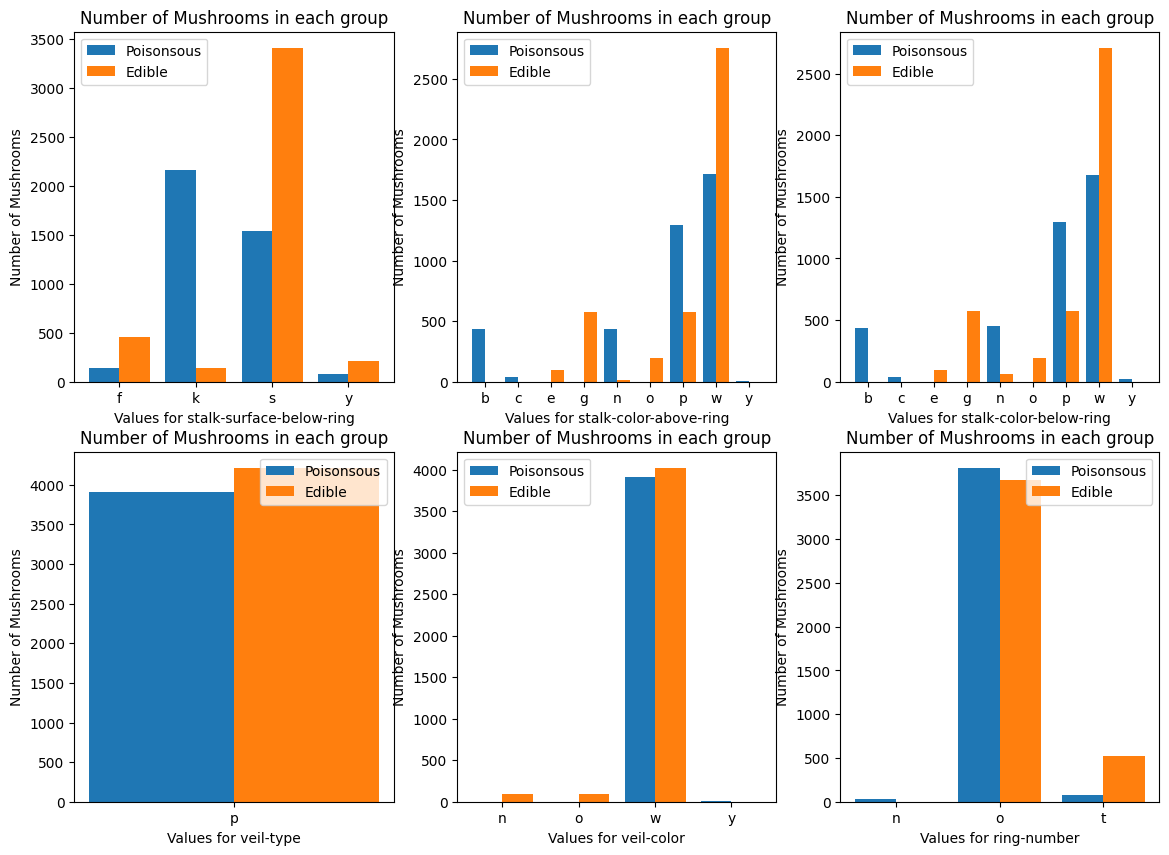

In [257]:
showBarPlot(13,19)

[1768, 0, 1296, 36, 816]
[1008, 48, 0, 0, 3152]
At k =  19  19
[0, 1584, 224, 224, 0, 72, 0, 1812, 0]
[48, 48, 1648, 1744, 48, 0, 48, 576, 48]
At k =  20  20
[0, 52, 0, 368, 2848, 648]
[384, 288, 400, 880, 1192, 1064]
At k =  21  21
[1268, 740, 592, 36, 1008, 272, 0]
[1880, 1408, 240, 256, 136, 96, 192]
At k =  22  22


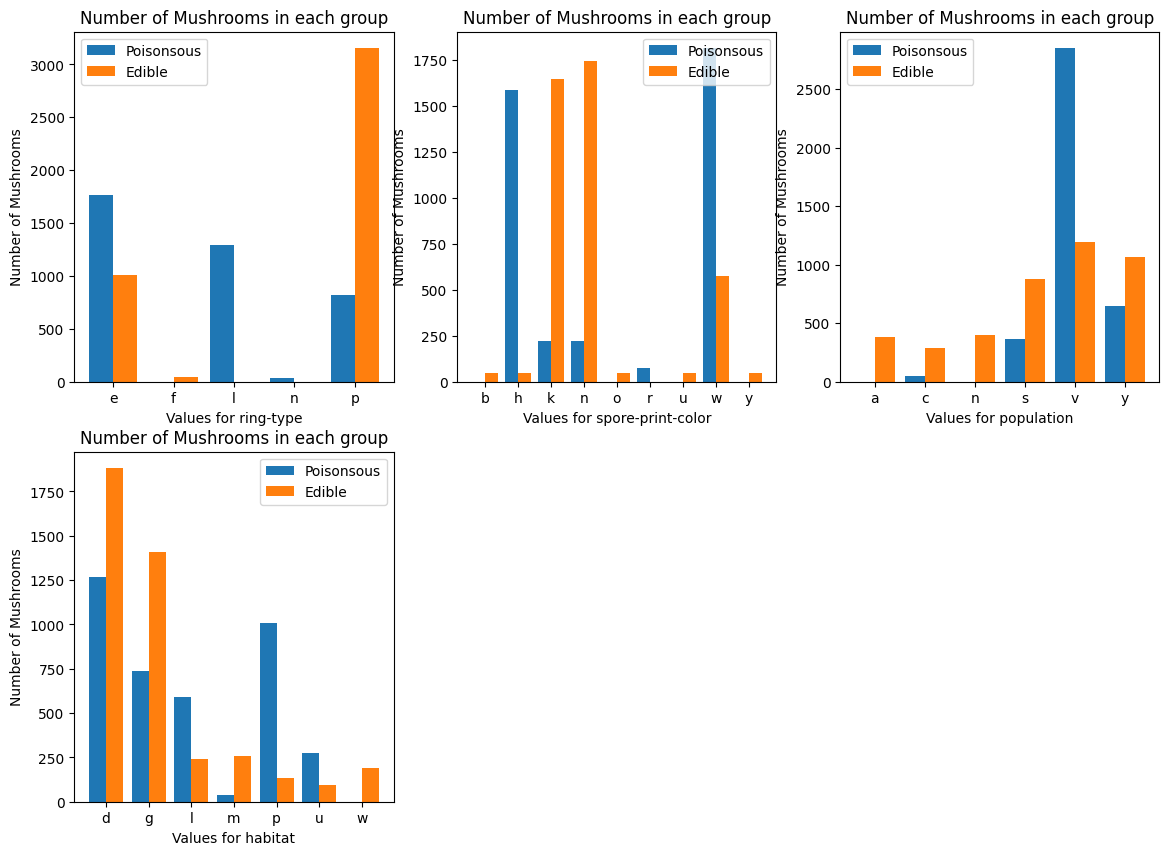

In [258]:
showBarPlot(19,23)


In [259]:
def showPiePlot(n,m):
    """
        Function for plotting pie charts for features m to n
        m - n must be 6 as the plot has 6 subplots
    """
    subplotNumber =1
    plt.figure(figsize=(14,10))
    for i in range(n,m):
        feature_counts = df[obj_features[i]].value_counts()
        counts =[]
        labels =[]
        
        for x,y in feature_counts.items():
            counts.append(y)
            labels.append(x)
        print(counts)
        print(labels)
        plt.subplot(2, 3, subplotNumber)
        subplotNumber+=1
        plt.xlabel(obj_features[i])
        plt.pie(counts, labels = labels)
    
    plt.show()

Plotting Pie charts for each feature with all its possible values count

[3656, 3152, 828, 452, 32, 4]
['x', 'f', 'k', 'b', 's', 'c']
[3244, 2556, 2320, 4]
['y', 's', 'f', 'g']
[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]
['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']
[4748, 3376]
['f', 't']
[3528, 2160, 576, 576, 400, 400, 256, 192, 36]
['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm']
[7914, 210]
['f', 'a']


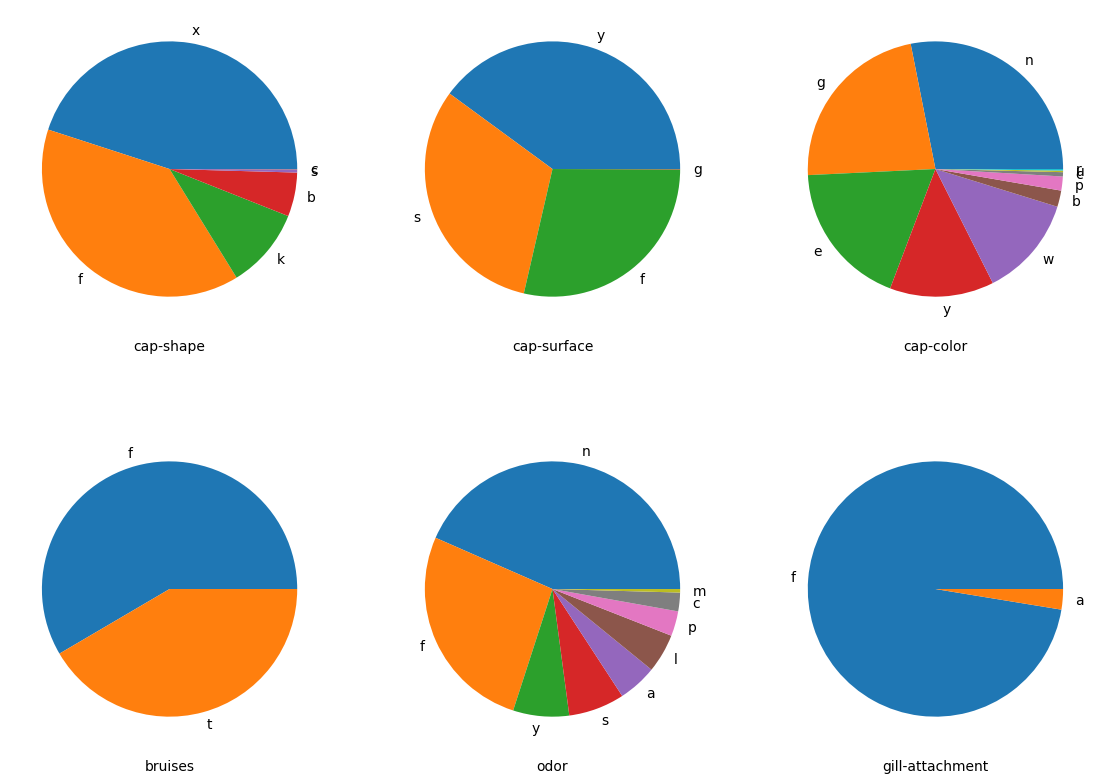

In [260]:
showPiePlot(1,7)

[6812, 1312]
['c', 'w']
[5612, 2512]
['b', 'n']
[1728, 1492, 1202, 1048, 752, 732, 492, 408, 96, 86, 64, 24]
['b', 'p', 'w', 'n', 'g', 'h', 'u', 'k', 'e', 'y', 'o', 'r']
[4608, 3516]
['t', 'e']
[3776, 2480, 1120, 556, 192]
['b', '?', 'e', 'c', 'r']
[5176, 2372, 552, 24]
['s', 'k', 'f', 'y']


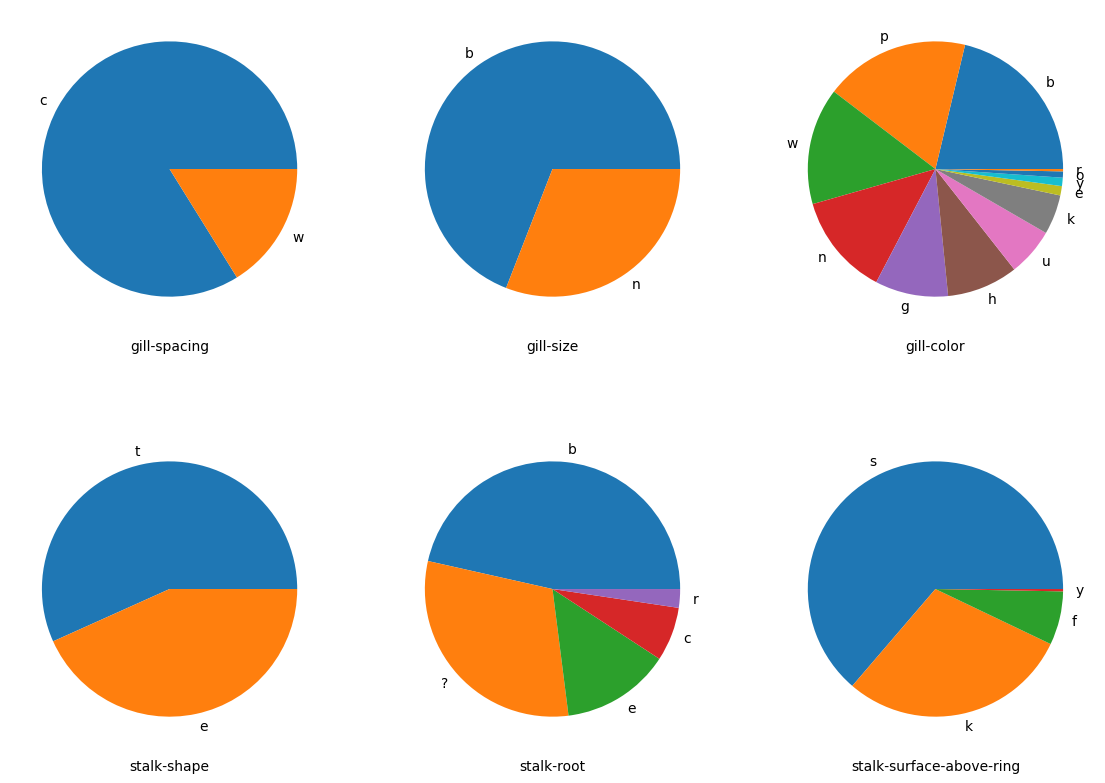

In [261]:
showPiePlot(7,13)

[4936, 2304, 600, 284]
['s', 'k', 'f', 'y']
[4464, 1872, 576, 448, 432, 192, 96, 36, 8]
['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y']
[4384, 1872, 576, 512, 432, 192, 96, 36, 24]
['w', 'p', 'g', 'n', 'b', 'o', 'e', 'c', 'y']
[8124]
['p']
[7924, 96, 96, 8]
['w', 'n', 'o', 'y']
[7488, 600, 36]
['o', 't', 'n']


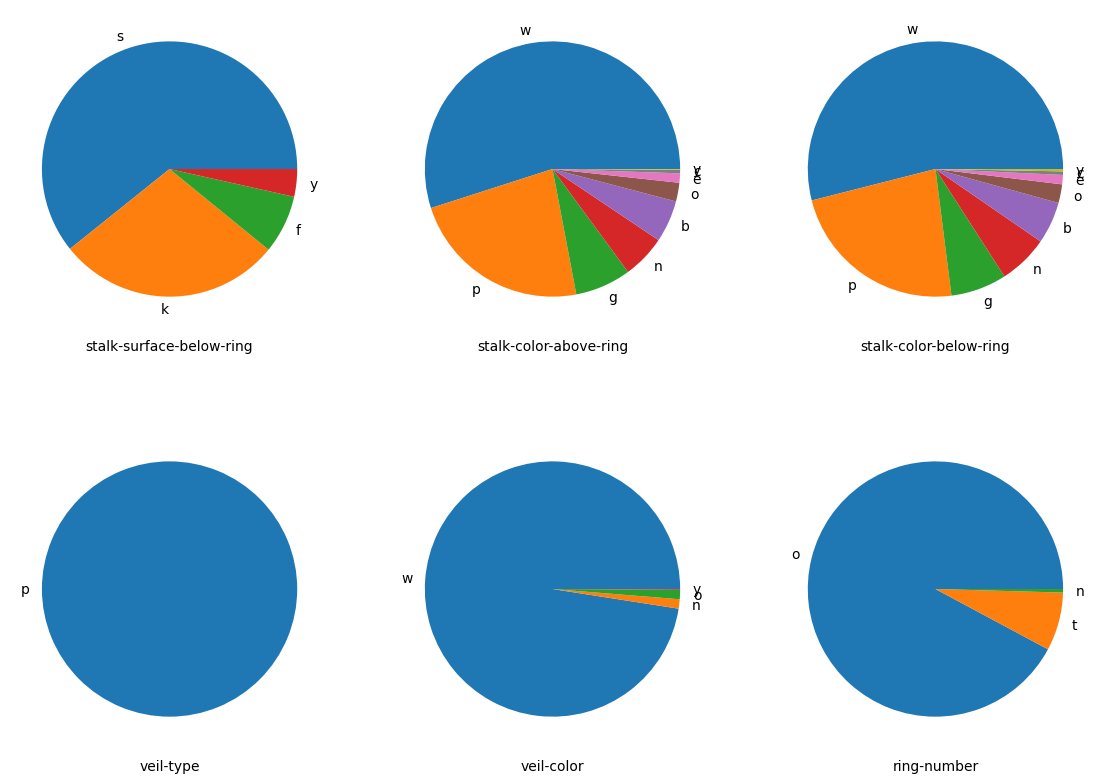

In [262]:
showPiePlot(13,19)

[3968, 2776, 1296, 48, 36]
['p', 'e', 'l', 'f', 'n']
[2388, 1968, 1872, 1632, 72, 48, 48, 48, 48]
['w', 'n', 'k', 'h', 'r', 'u', 'o', 'y', 'b']
[4040, 1712, 1248, 400, 384, 340]
['v', 'y', 's', 'n', 'a', 'c']
[3148, 2148, 1144, 832, 368, 292, 192]
['d', 'g', 'p', 'l', 'u', 'm', 'w']


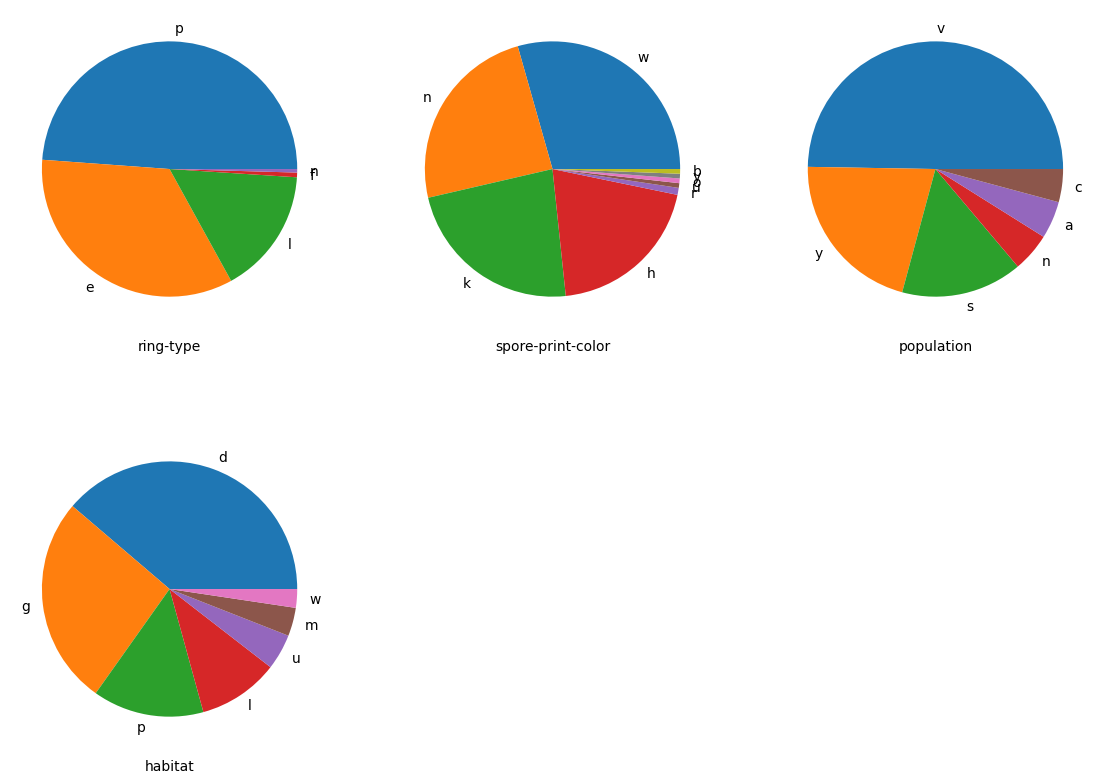

In [263]:
showPiePlot(19,23)

Labeling the categorical data

In [264]:
labelEncoder = LabelEncoder()
map = []
for c in obj_features:
    labelEncoder.fit(df[c])
    df[c] = labelEncoder.transform(df[c])
    dic = {index: label for index,label in enumerate(labelEncoder.classes_)}
    map.append(dic)
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Separating input(X) from output(Y)

In [265]:
Y = df['class']
X = df.drop('class',axis =1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


Normalizing the input X using MinMaxScaler

In [266]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,0.0,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,0.0,...,0.666667,0.625,0.625,0.0,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,0.0,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.333333,0.875,0.875,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


Plotting Kendall Correlation Matrix

<AxesSubplot: >

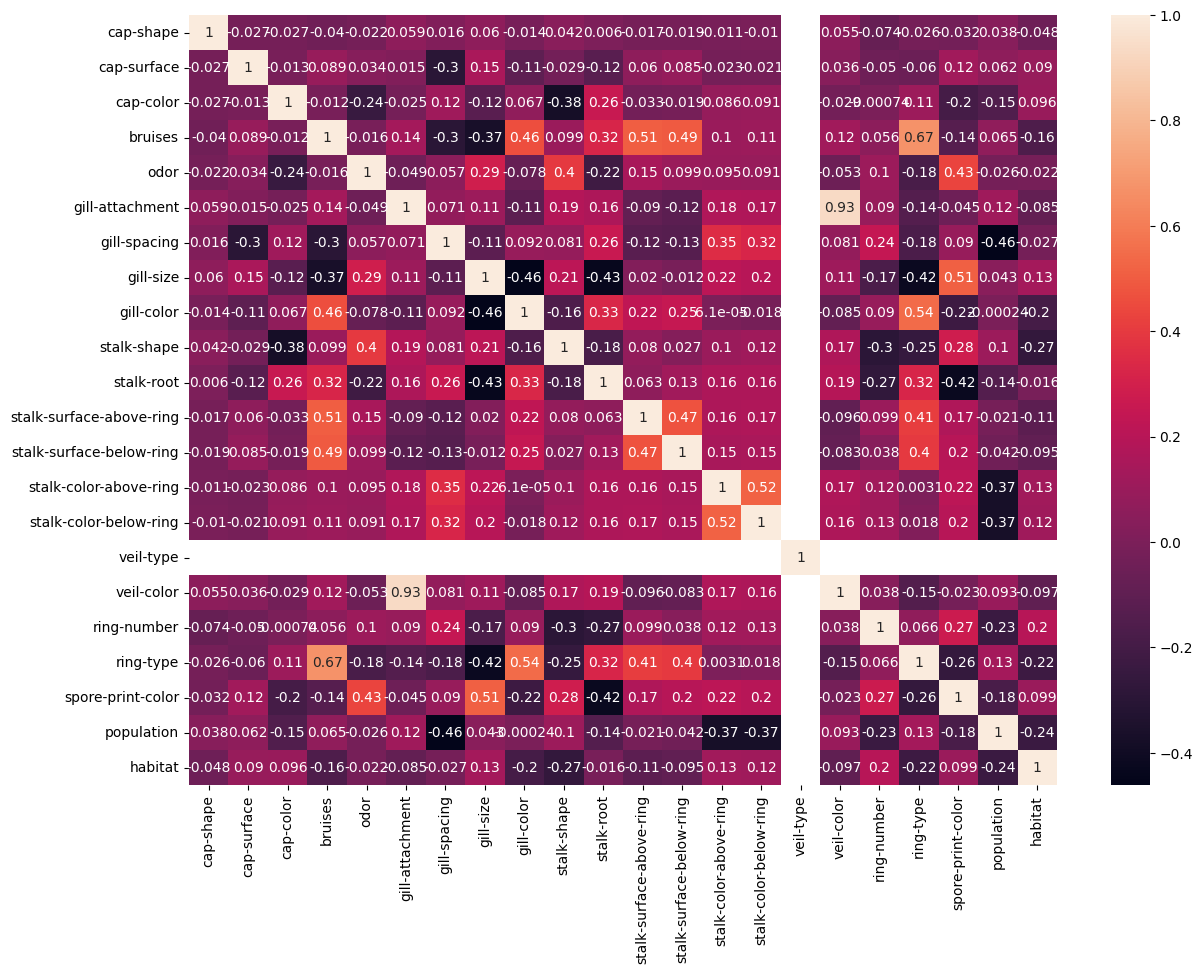

In [276]:
corr = X.corr(method= 'kendall')
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot= True)

Plotting Pearson Correlation Matrix

<AxesSubplot: >

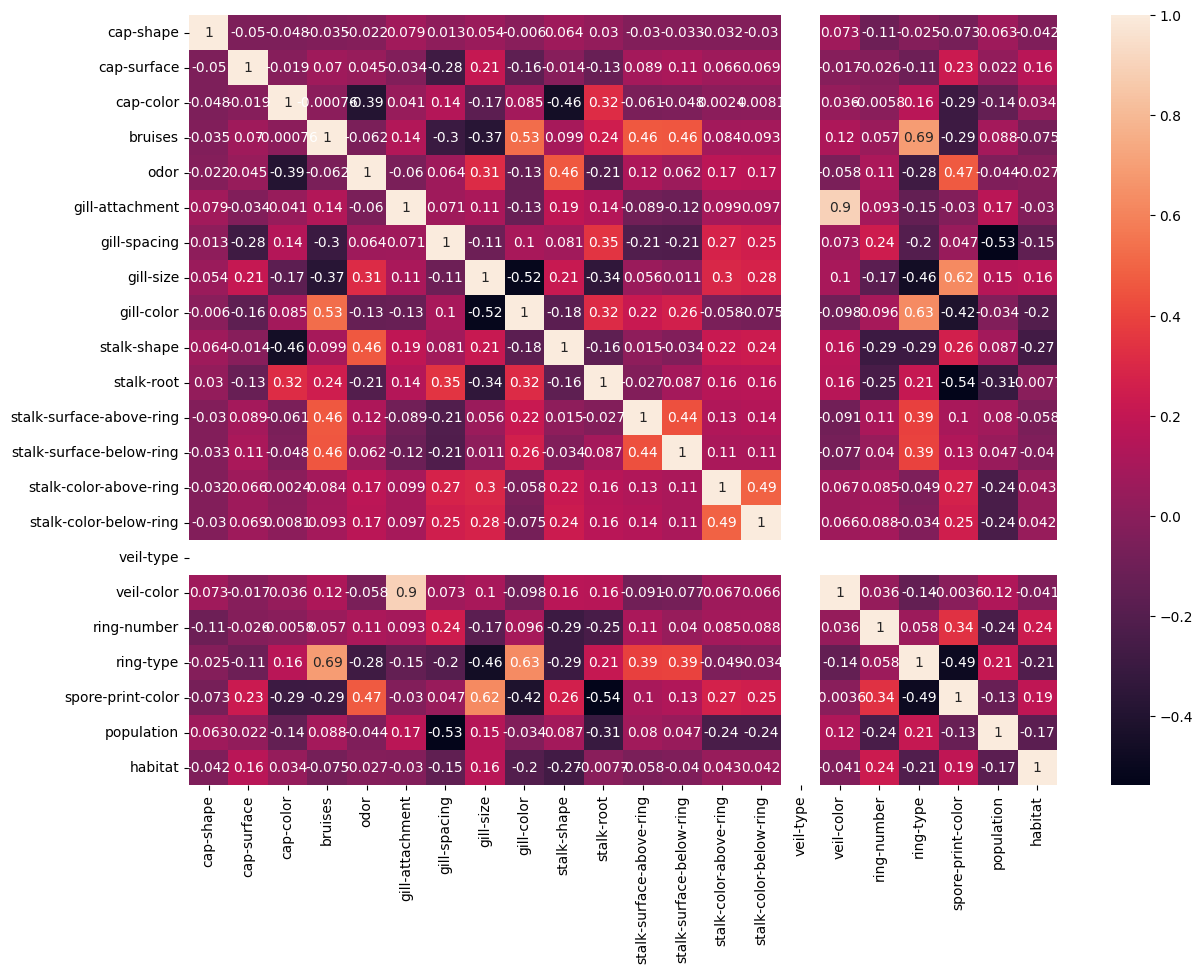

In [267]:
corr = X.corr(method= 'pearson')

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot= True)

We can see here that veil-type has only 1 value so there is no need for it. As it has no contribution in classifying data.  
So we can drop this feature.  
veil-color feature is also strongly correlated to gill-attachment with r= 0.9.  
So we can drop any of these two features.


In [268]:
print(X['veil-type'].any())
X1 = X.drop('veil-type',axis =1)
# 
X1 = X1.drop('veil-color',axis =1) 

X1 = X1.drop('bruises',axis =1)

obj_features.remove('class')
obj_features.remove('veil-type')
obj_features.remove('veil-color')
obj_features.remove('bruises')

False


Split Data into training and testing sets

In [269]:
X_train, X_test, Y_train,Y_test = train_test_split(X1,Y,train_size=0.8,random_state=0)

Importing functions to measure the accuracy of each model

In [270]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [271]:
logisiticRegression = LogisticRegression(random_state=100)

logisiticRegression.fit(X_train,Y_train)

y_pred = logisiticRegression.predict(X_test)

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred))


Accuracy:  0.9489230769230769
Confusion Matrix:
 [[819  33]
 [ 50 723]]


### Gaussian Naive Bayes

In [272]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(X_train,Y_train)

y_pred = GNB.predict(X_test)

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred))

Accuracy:  0.9175384615384615
Confusion Matrix:
 [[772  80]
 [ 54 719]]


### K-Nearest Neighbors

In [273]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,6):
    KNN = KNeighborsClassifier(n_neighbors=i)

    KNN.fit(X_train,Y_train)

    y_pred = KNN.predict(X_test)

    print(f"Accuracy with k={i}: ",accuracy_score(Y_test,y_pred))
    print(f"Confusion Matrix with k={i}:\n",confusion_matrix(Y_test,y_pred))

Accuracy with k=1:  1.0
Confusion Matrix with k=1:
 [[852   0]
 [  0 773]]
Accuracy with k=2:  1.0
Confusion Matrix with k=2:
 [[852   0]
 [  0 773]]
Accuracy with k=3:  1.0
Confusion Matrix with k=3:
 [[852   0]
 [  0 773]]
Accuracy with k=4:  1.0
Confusion Matrix with k=4:
 [[852   0]
 [  0 773]]
Accuracy with k=5:  1.0
Confusion Matrix with k=5:
 [[852   0]
 [  0 773]]


### Decision Tree

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DT = DecisionTreeClassifier()

DT = DT.fit(X_train,Y_train)

y_pred = DT.predict(X_test)

print("Accuracy: ",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred))



Accuracy:  1.0
Confusion Matrix:
 [[852   0]
 [  0 773]]


Plotting Decision Tree

[Text(0.39903846153846156, 0.9375, 'gill-color <= 0.318\ngini = 0.499\nsamples = 6499\nvalue = [3356, 3143]'),
 Text(0.19230769230769232, 0.8125, 'population <= 0.7\ngini = 0.272\nsamples = 2644\nvalue = [430, 2214]'),
 Text(0.07692307692307693, 0.6875, 'spore-print-color <= 0.188\ngini = 0.22\nsamples = 460\nvalue = [402, 58]'),
 Text(0.038461538461538464, 0.5625, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.11538461538461539, 0.5625, 'gill-size <= 0.5\ngini = 0.082\nsamples = 420\nvalue = [402, 18]'),
 Text(0.07692307692307693, 0.4375, 'gini = 0.0\nsamples = 402\nvalue = [402, 0]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.3076923076923077, 0.6875, 'stalk-root <= 0.5\ngini = 0.025\nsamples = 2184\nvalue = [28, 2156]'),
 Text(0.2692307692307692, 0.5625, 'stalk-surface-below-ring <= 0.167\ngini = 0.009\nsamples = 2166\nvalue = [10, 2156]'),
 Text(0.23076923076923078, 0.4375, 'odor <= 0.438\ngini = 0.452\nsamples = 29\nvalue = [10

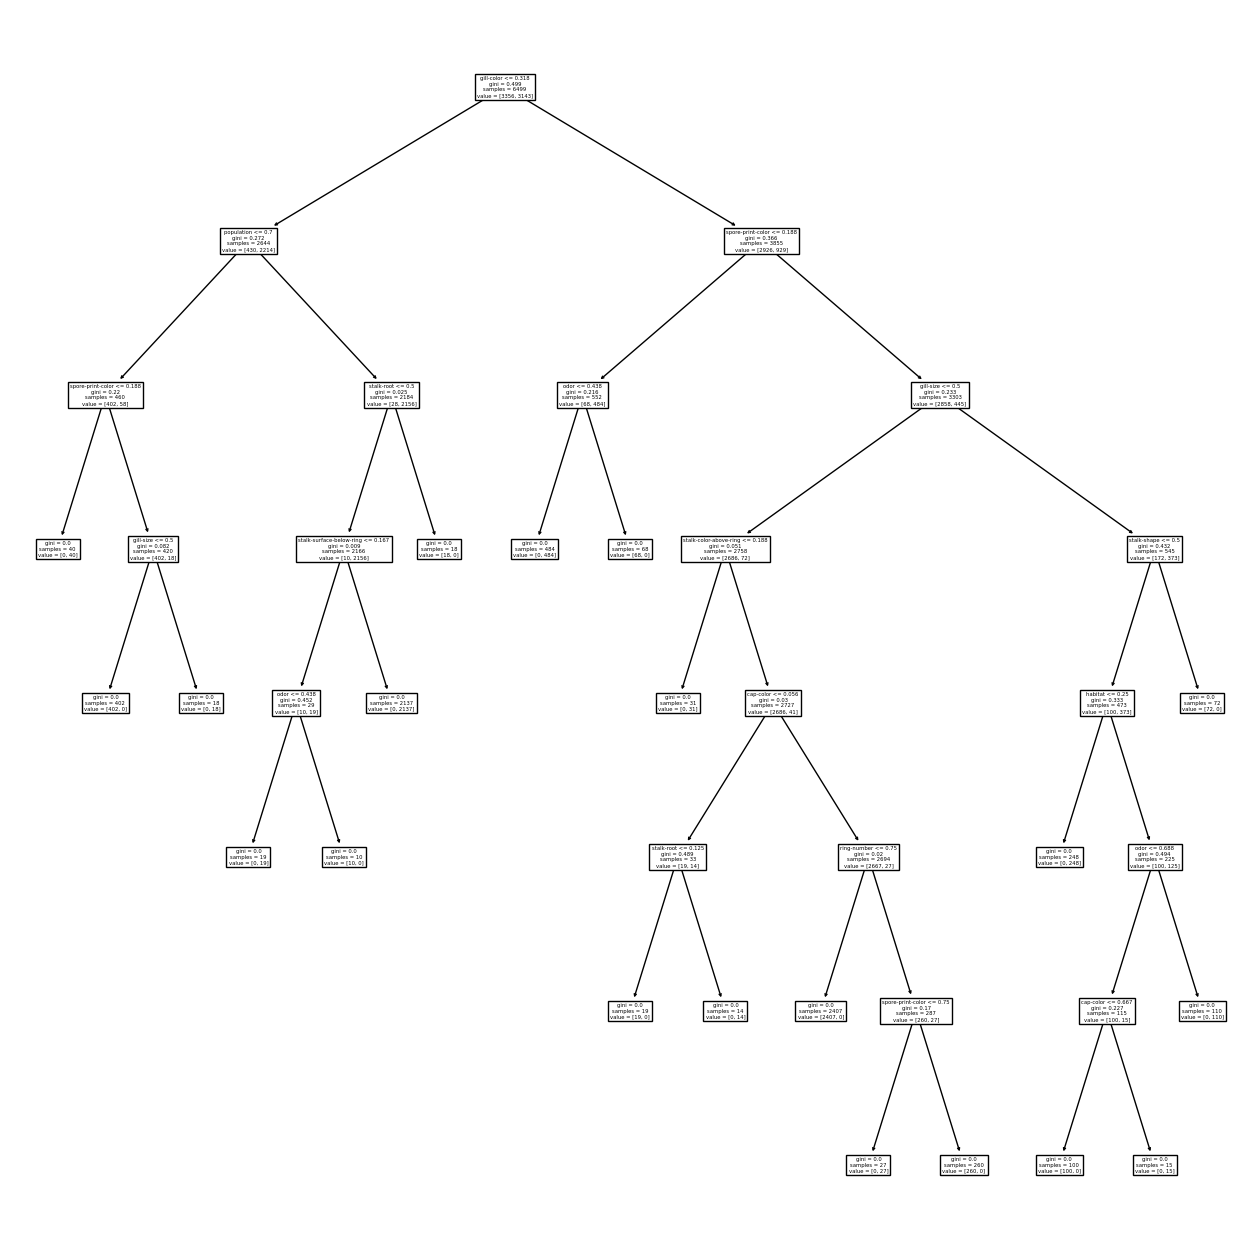

In [275]:

plt.figure(figsize=(16,16))
tree.plot_tree(DT,feature_names = obj_features)